<h1>Machine Learning Assisgnment: Healthcare</h1>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
import os
import plotly.graph_objects as go
from matplotlib.axes import Axes

<h3>Importing excel dataset</h3>

In [110]:
# hcare
ds = pd.read_excel("1645792390_cep1_dataset.xlsx")

In [111]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [112]:
ds.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<h3>Checking Shape, information and Null Values in the dataset</h3>

In [113]:
ds.shape

(303, 14)

In [114]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [115]:
ds.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<h3>Checking Null</h3>

In [35]:
ds.isnull().sum(axis = 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [116]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h4>No Missing values in the dataset</h4>
<h3>Checking for the duplicate entries</h3>

In [117]:
ds.duplicated().sum()

1

In [118]:
ds.loc[ds.duplicated(),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [119]:
ds.drop_duplicates(inplace = True, ignore_index = True)

In [120]:
ds.shape

(302, 14)

In [121]:
ds.duplicated().sum()

0

In [122]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h4>a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data</h4>

In [123]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


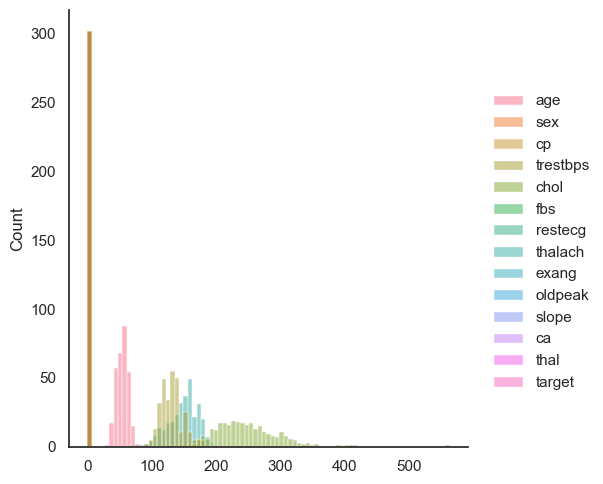

In [124]:
sns.displot(data=ds)

In [125]:
ds_num=ds.drop(columns=['target'])

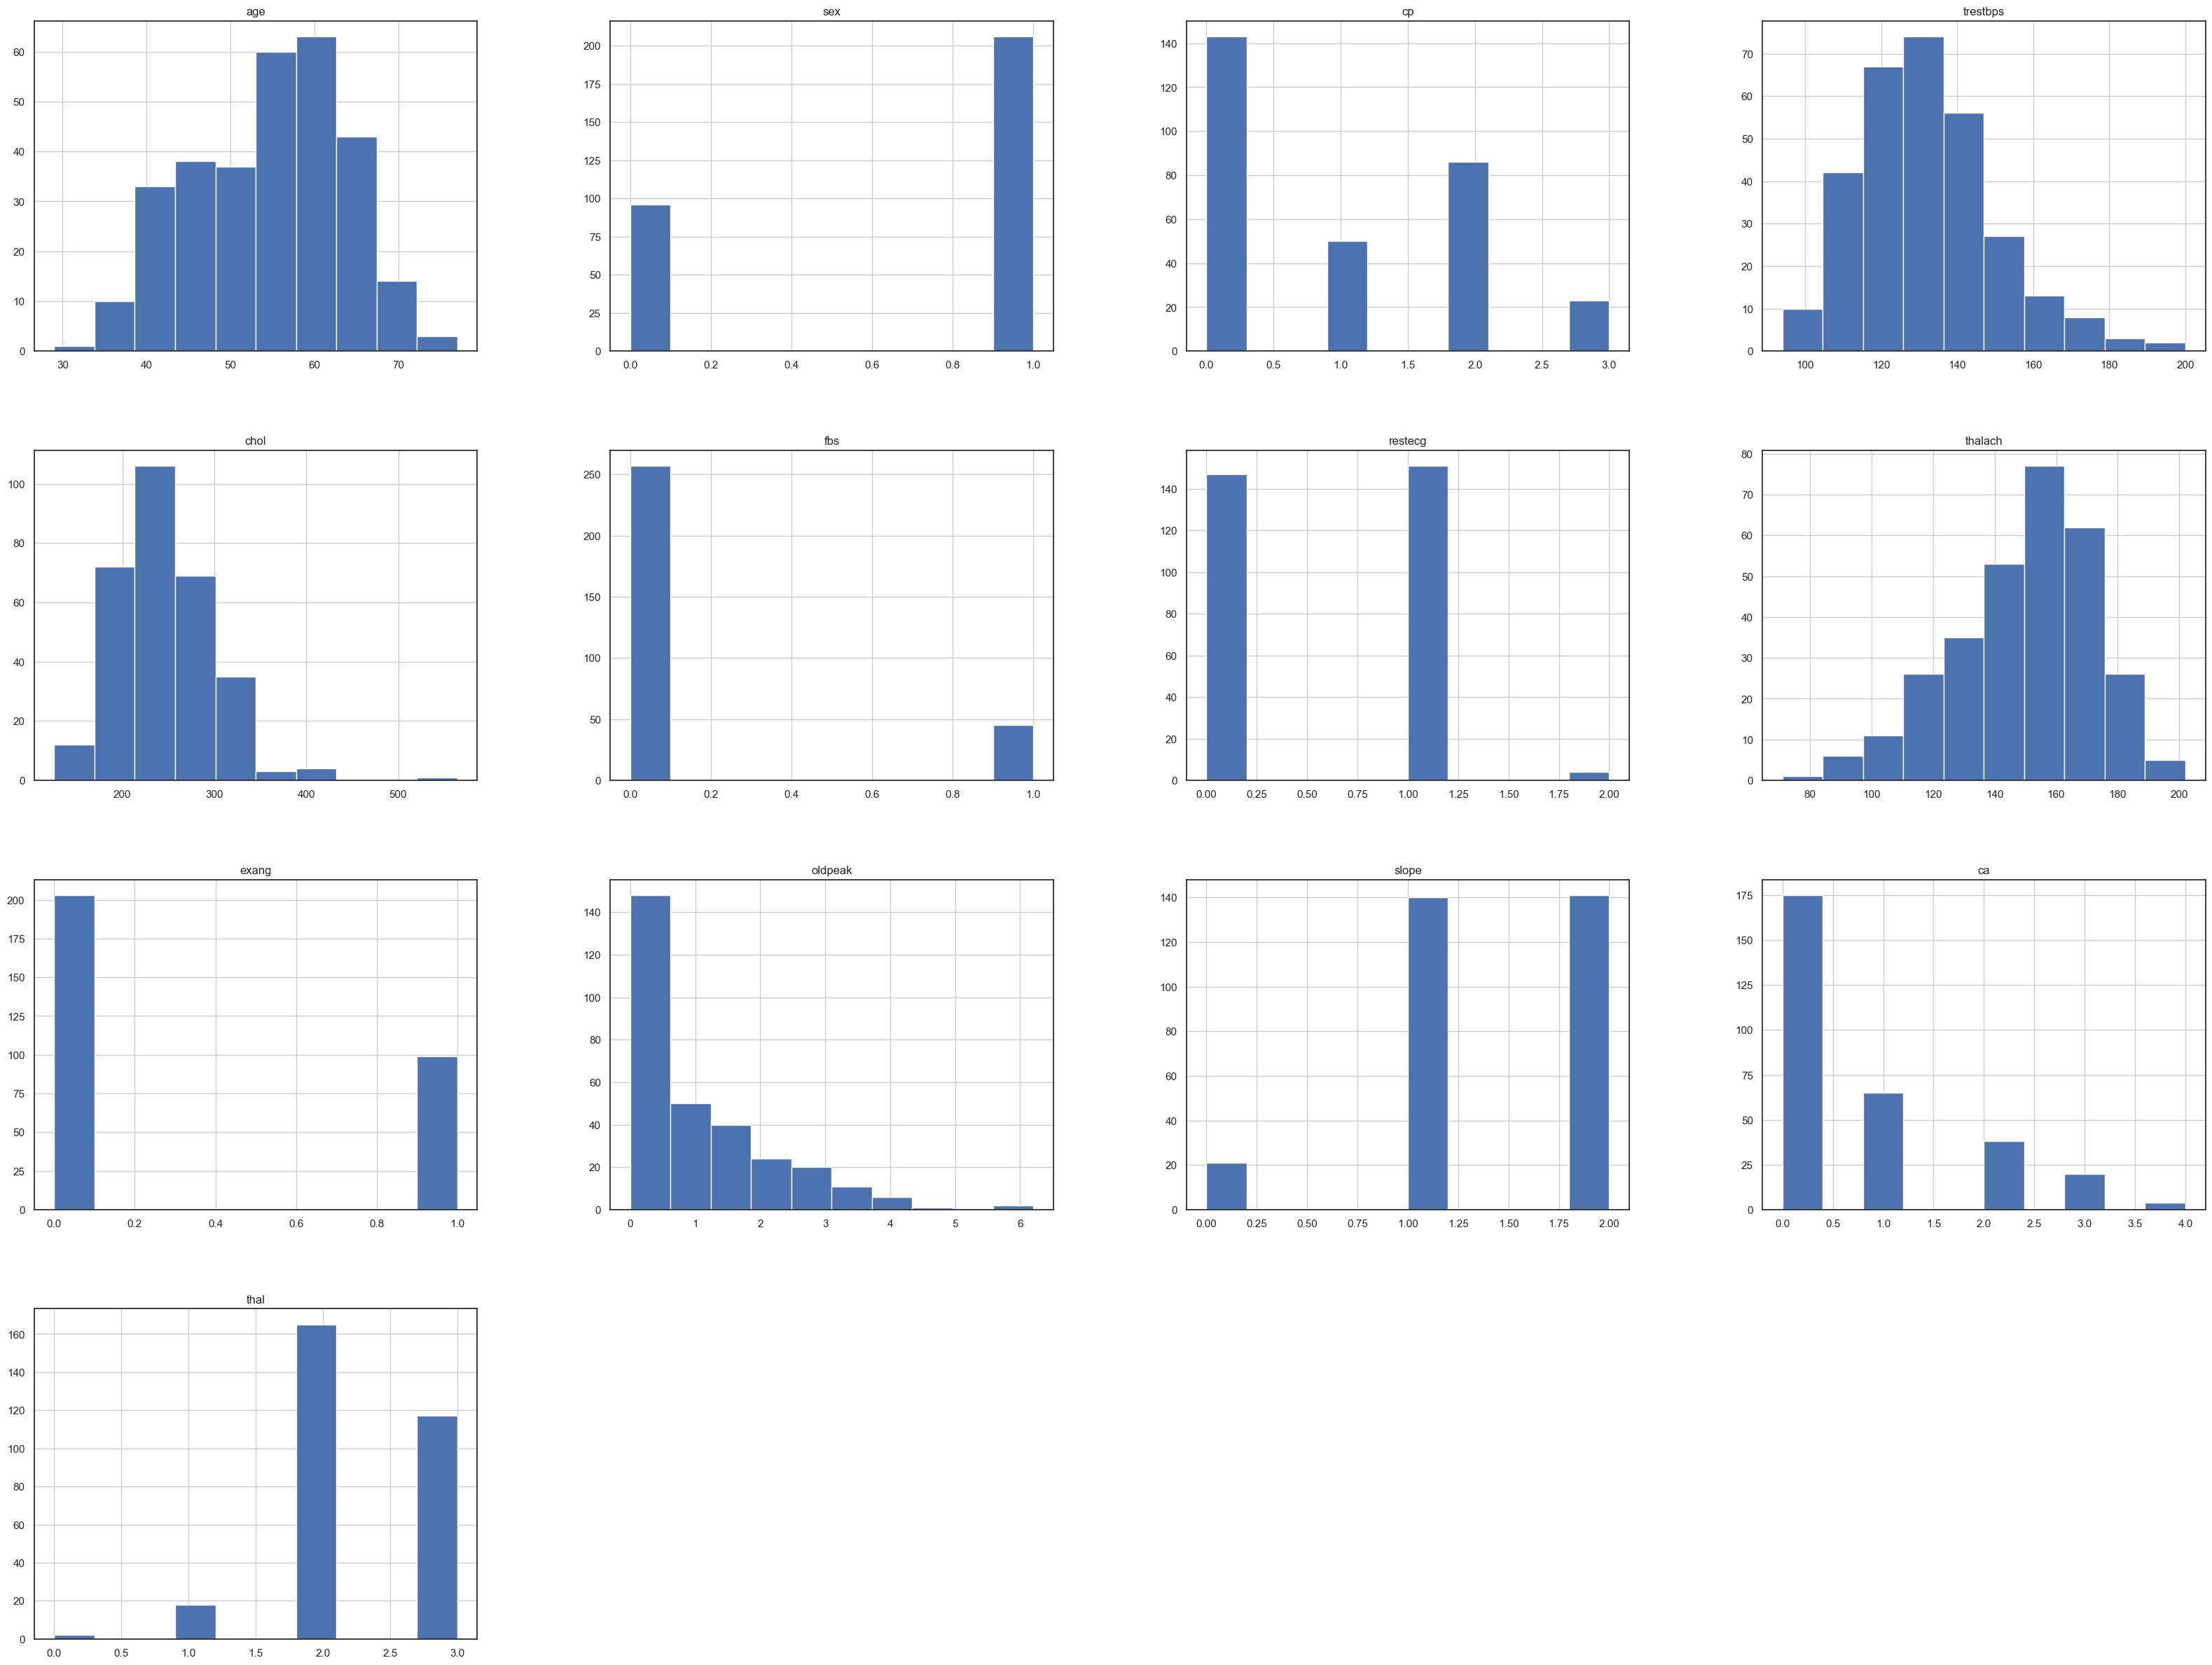

In [126]:
# Histogram of the Heart Dataset
fig = plt.figure(figsize = (40,30))
ds_num.hist(ax = fig.gca());

<h5>Understanding the Data</h5>

*Let us observe the creelation between different features with help of a heat mat.*

<h4>Creating a correlation heatmap</h4>

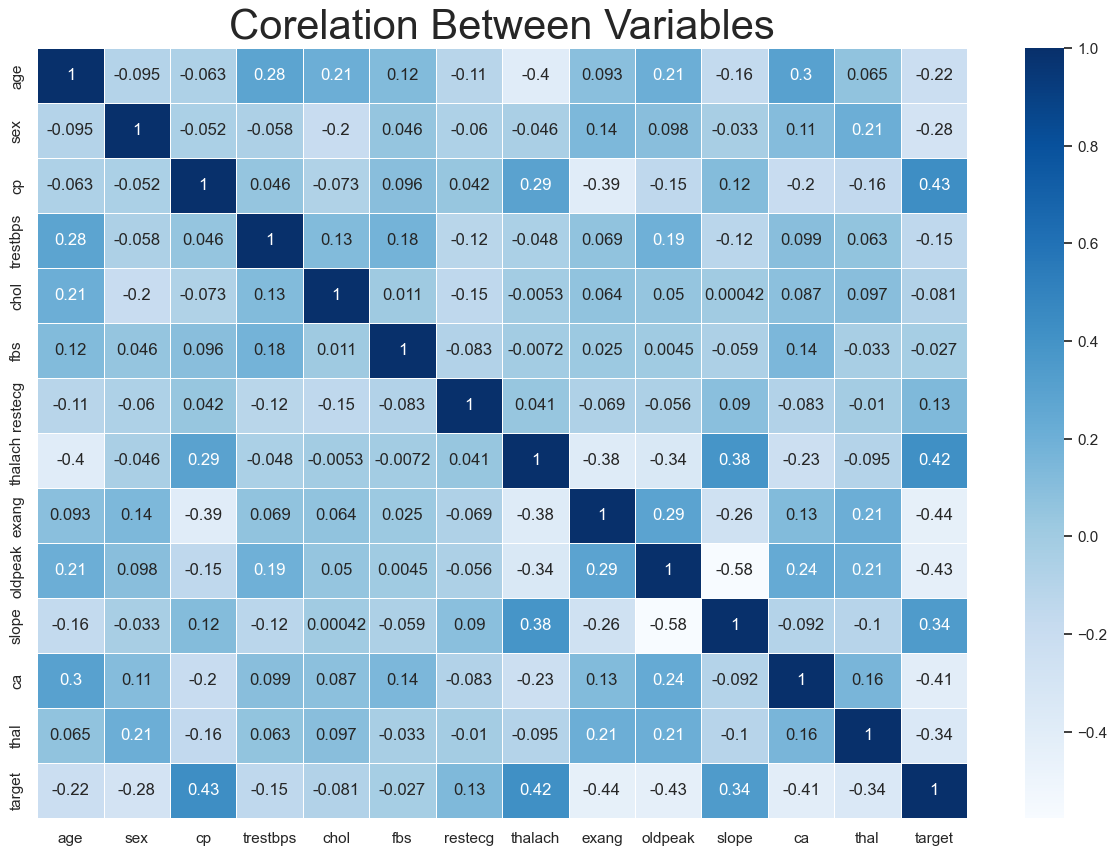

In [127]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(ds.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

*From the above HeatMap, we can see that cp and thalach are the features with highest positive correlation whereas exang, oldpeak and ca are negatively correlated.While other features do not hold much correlation with the response variable "target".*

<b>Outlier Detection</b>

*Since the dataset is not large, we cannot discard the outliers. We will treat the outliers as potential observations.*

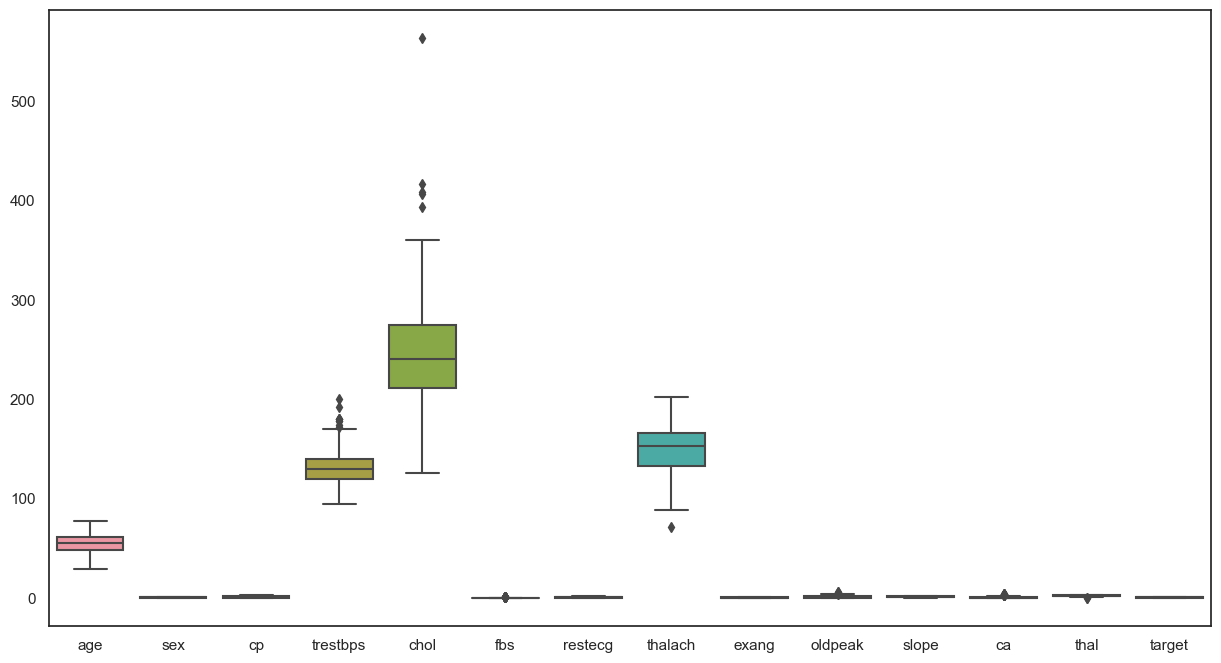

In [128]:
# Boxplots
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=ds, ax=ax);

<h4>b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot</h4>

In [129]:
ds_cate = ds.drop(columns = ["age", "trestbps", "chol", "thalach", "oldpeak"])
ds_cate

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
297,0,0,0,1,1,1,0,3,0
298,1,3,0,1,0,1,0,3,0
299,1,0,1,1,0,1,2,3,0
300,1,0,0,1,1,1,1,3,0


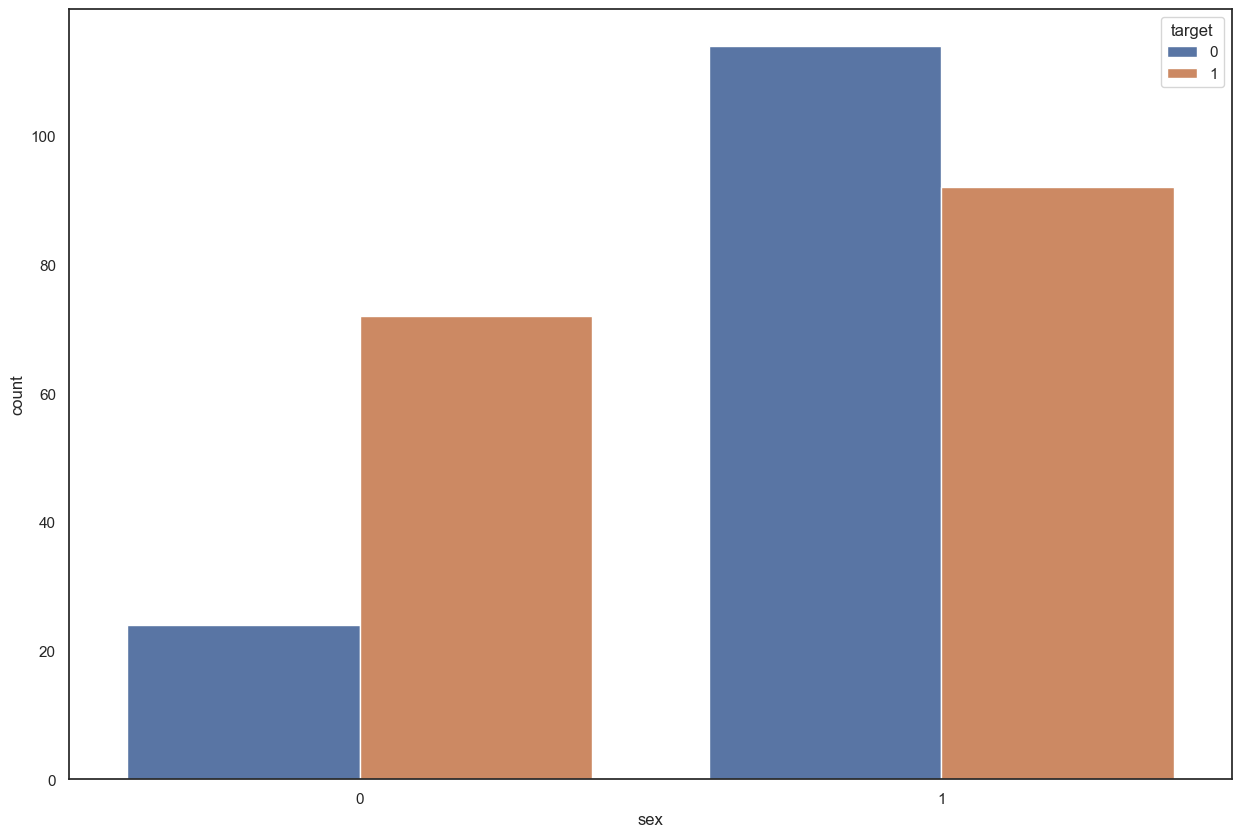

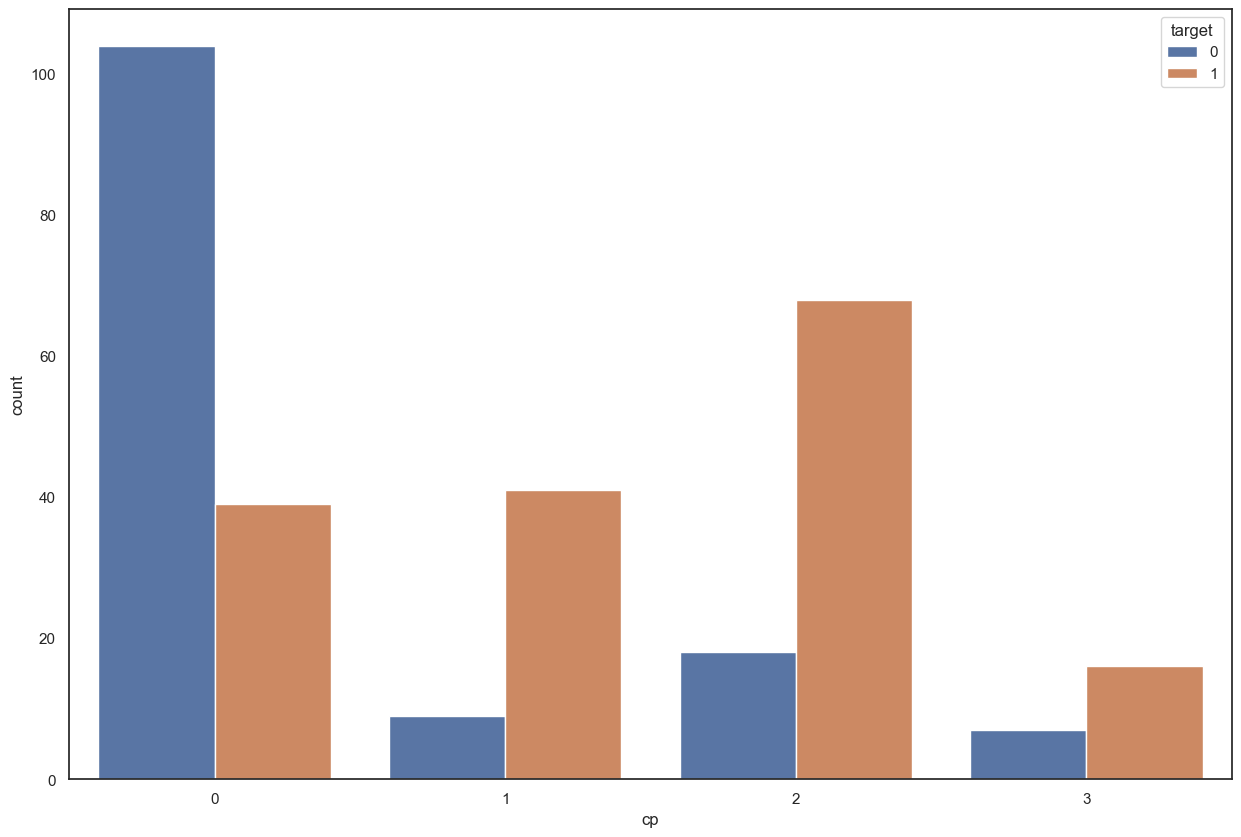

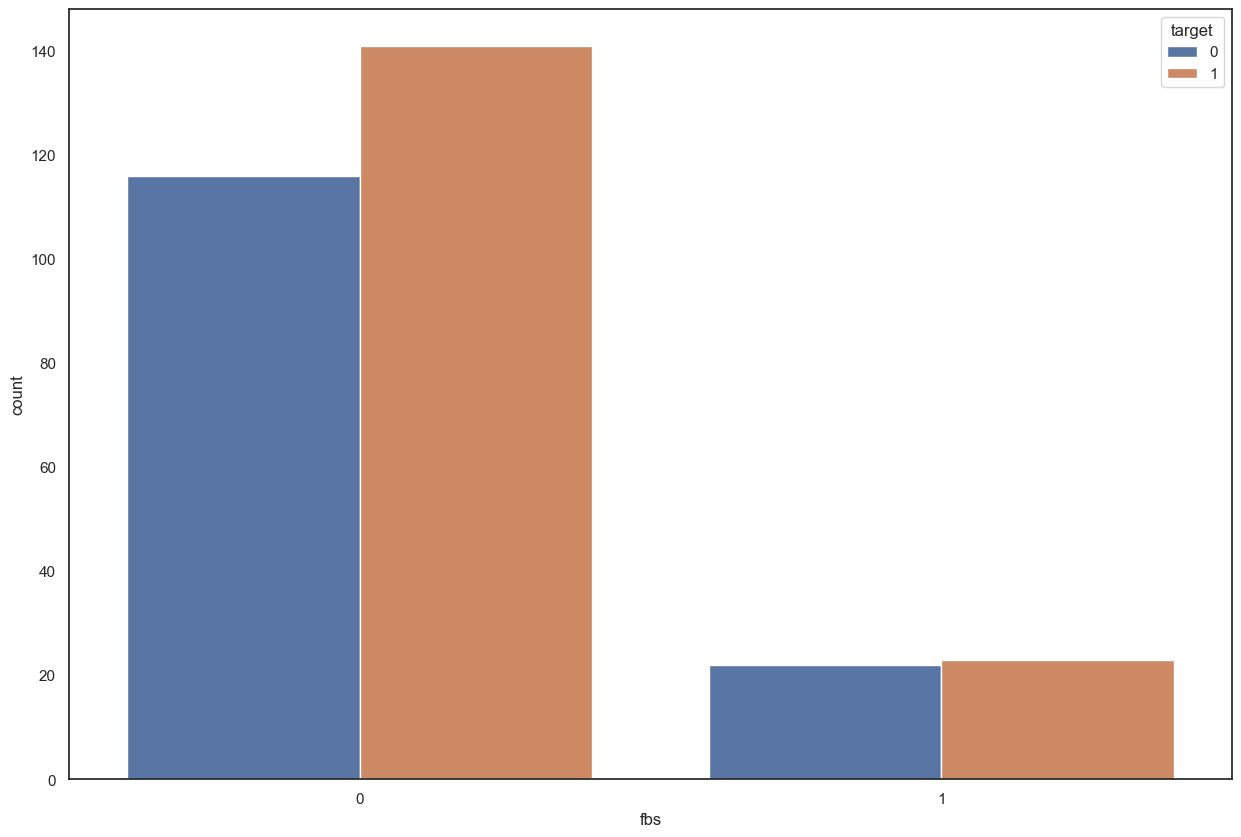

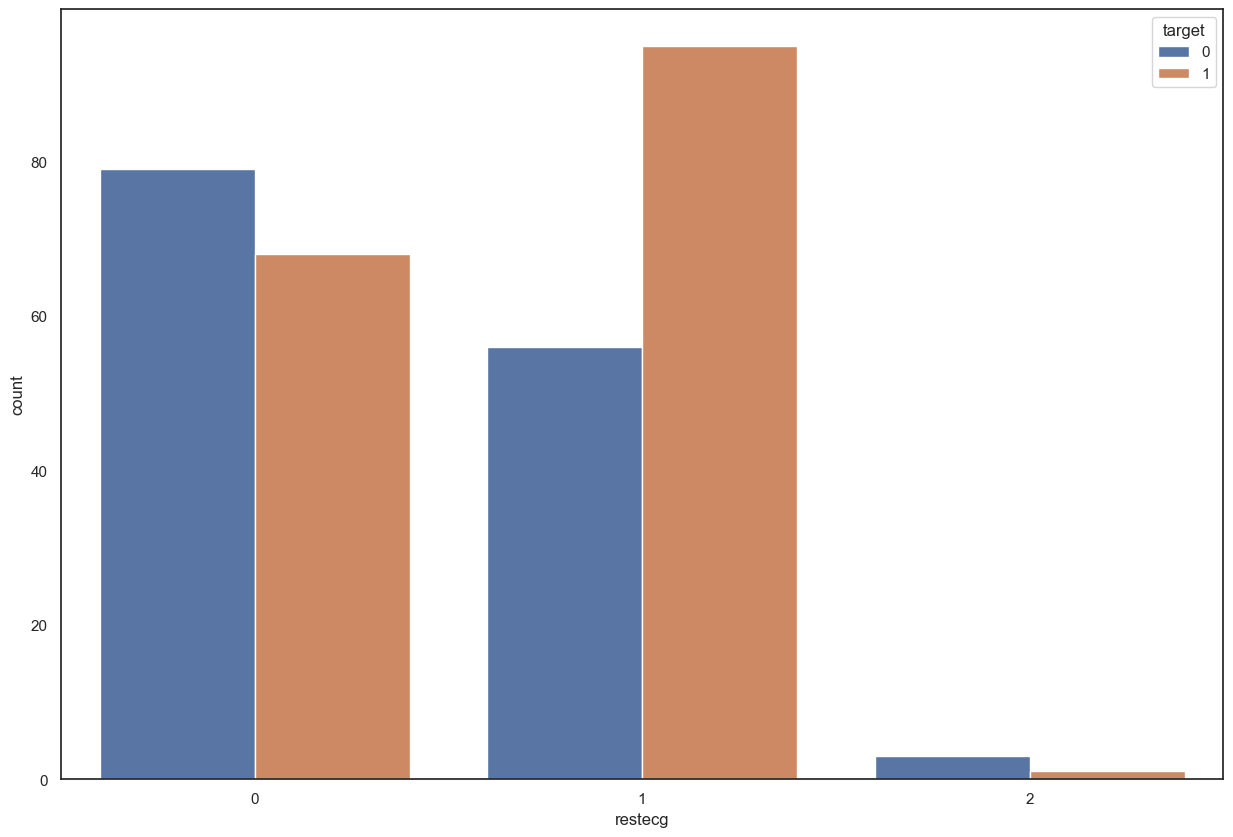

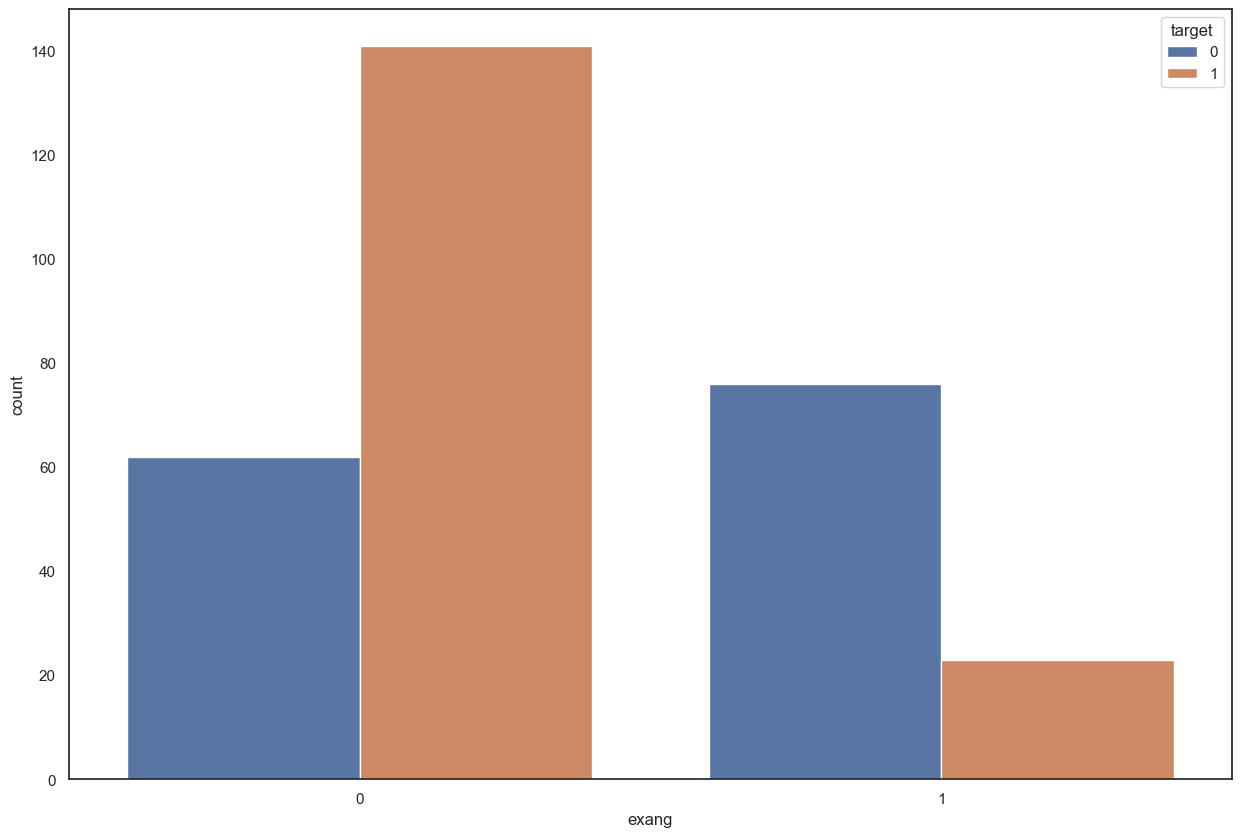

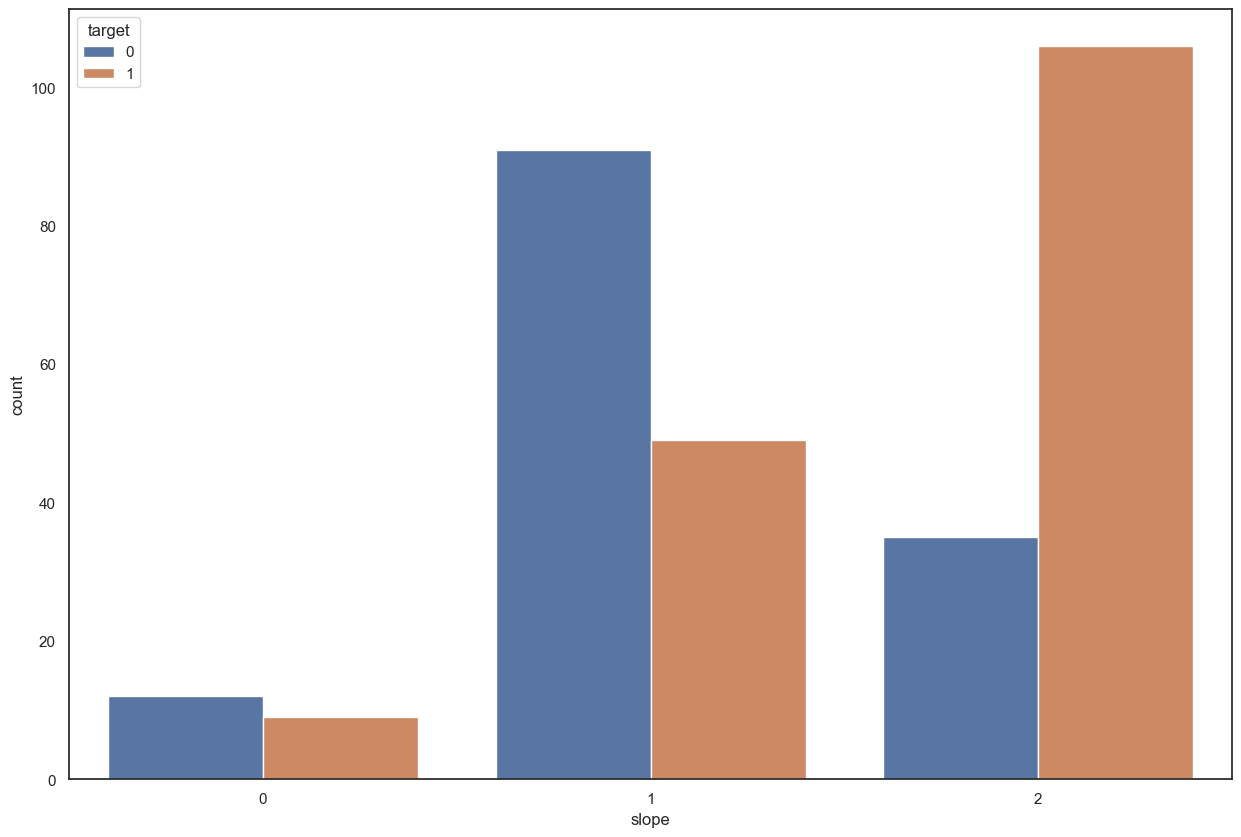

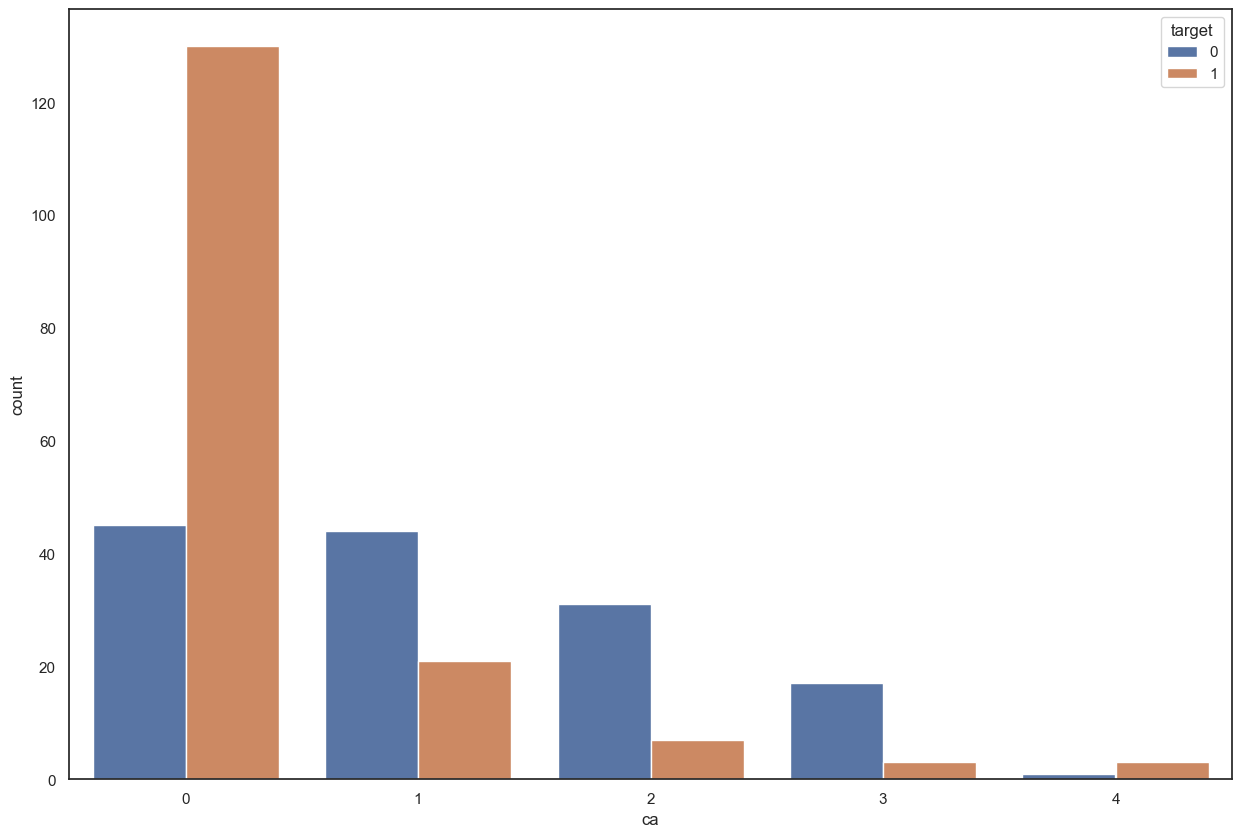

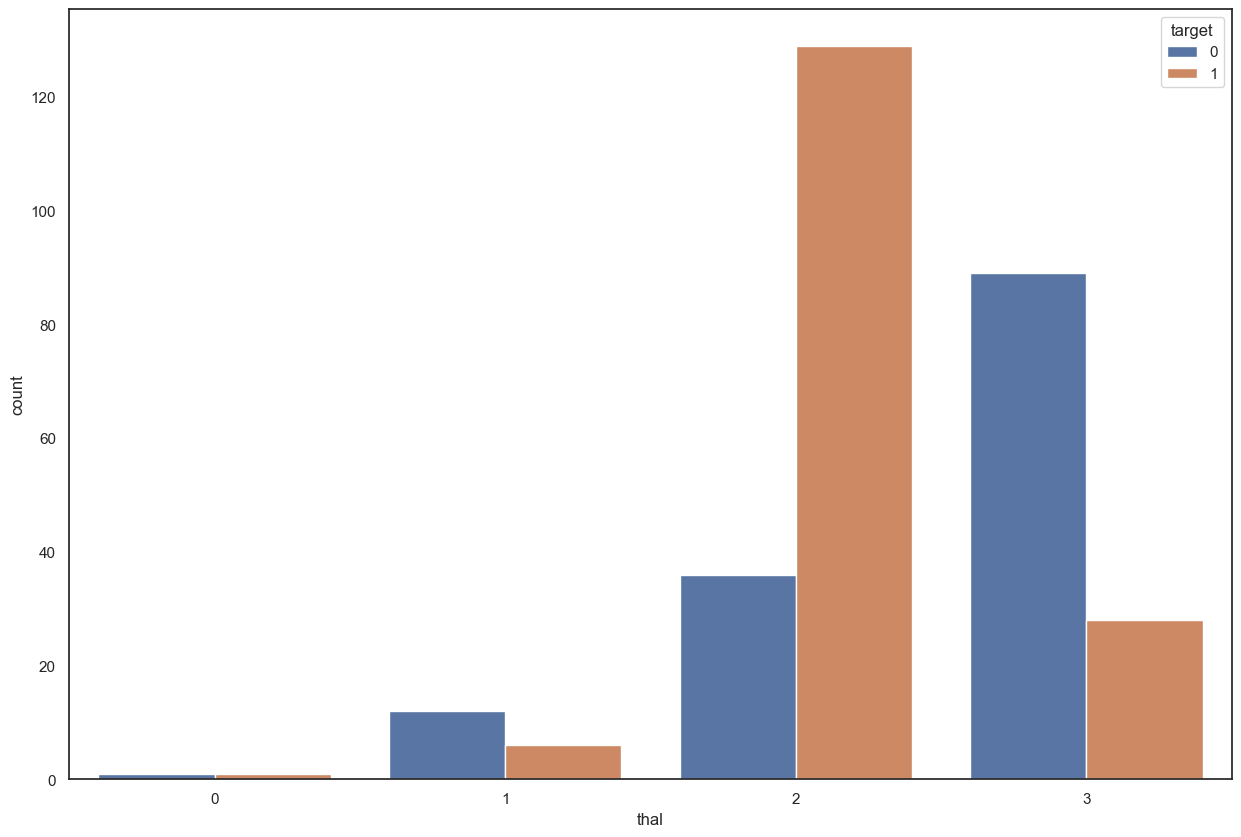

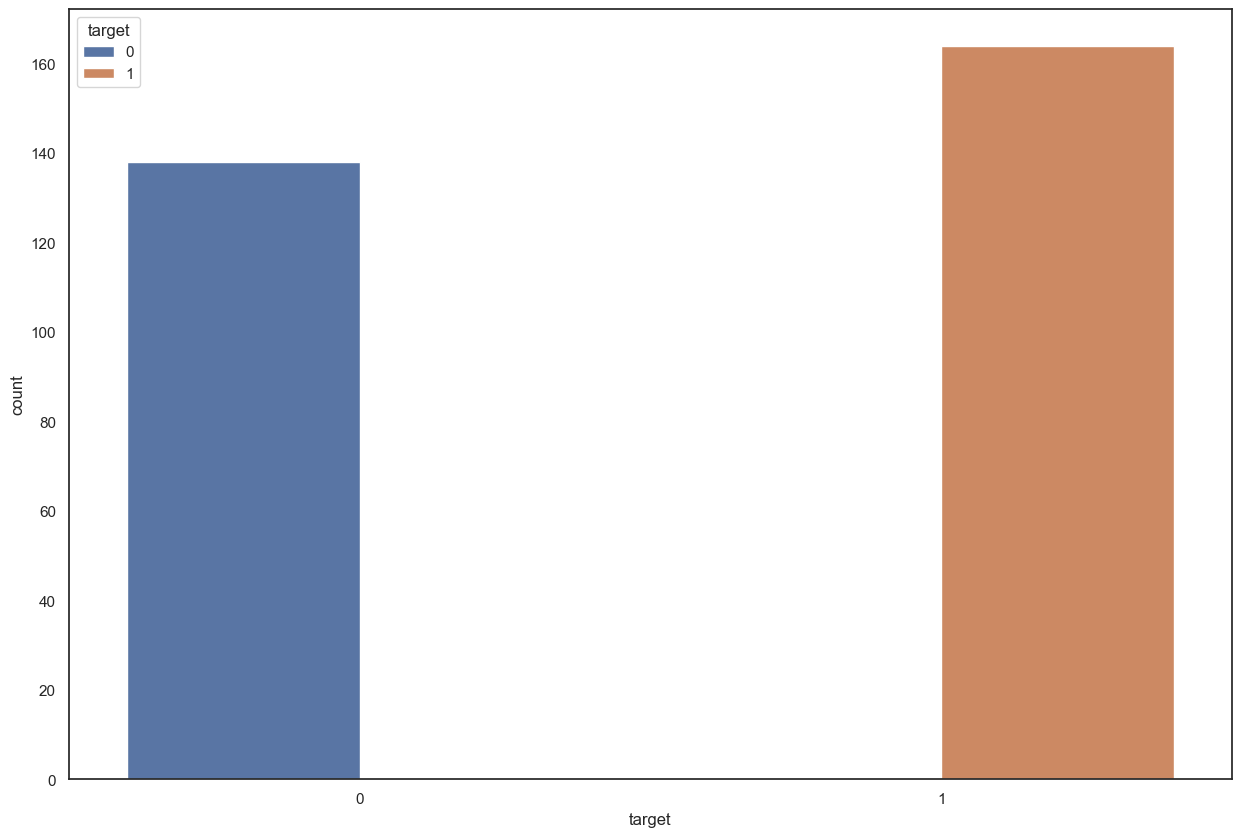

In [130]:
for i, col in enumerate(ds_cate.columns):
    plt.figure(i)
    ax = sns.countplot(x = ds_cate[col], data = ds_cate, hue = 'target')
    for container in ax.containers:        
        plt.show()

In [131]:
ds['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

<h4>c. Study the occurrence of CVD across the Age category</h4>

In [132]:
ds['age_bins'] = pd.cut(ds.age, [24, 29, 34, 39, 44, 49, 54, 59, 64, 69],
                          labels = ['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69'])

In [133]:
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-64
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,35-39
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-44
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55-59
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,55-59
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,45-49
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,65-69
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,55-59


In [134]:
ds_true = ds.loc[ds.target == 1]
ds_true
ds_true.age.unique()
ds_true['age_bins'] = pd.cut(ds_true.age, [24, 29, 34, 39, 44, 49, 54, 59, 64, 69],
                          labels = ['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69'])

ds_true['age_bins'].value_counts()

age_bins
50-54    38
40-44    30
55-59    27
45-49    20
60-64    17
65-69    15
35-39     8
30-34     2
25-29     1
Name: count, dtype: int64

<p><b>CVD is found maximum in the age group of 50-54 years.</b></p>

<h3>d. Study the composition of all patients with respect to the Sex category</h3>

In [135]:
ds_true['sex_bins'] = pd.cut(ds_true.sex, [-1, 0, 1],
                         labels = ['Female', 'Male'])
ds_true['sex_bins'].value_counts()

sex_bins
Male      92
Female    72
Name: count, dtype: int64

<p><b>Males have maximum CVD compared to females.</b></p>

<h3>e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient</h3>

   index  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      8   52    1   2       172   199    1        1      162      0      0.5   
1    101   59    1   3       178   270    0        0      145      0      4.2   
2    110   64    0   0       180   325    0        1      154      1      0.0   
3    202   68    1   2       180   274    1        0      150      1      1.6   
4    222   56    0   0       200   288    1        0      133      1      4.0   
5    240   59    0   0       174   249    0        1      143      1      0.0   
6    247   54    1   1       192   283    0        0      195      0      0.0   
7    259   66    0   0       178   228    1        1      165      1      1.0   
8    265   55    0   0       180   327    0        2      117      1      3.4   

   slope  ca  thal  target age_bins  
0      2   0     3       1    50-54  
1      0   0     3       1    55-59  
2      2   0     2       1    60-64  
3      1   0     3       0    65-69  

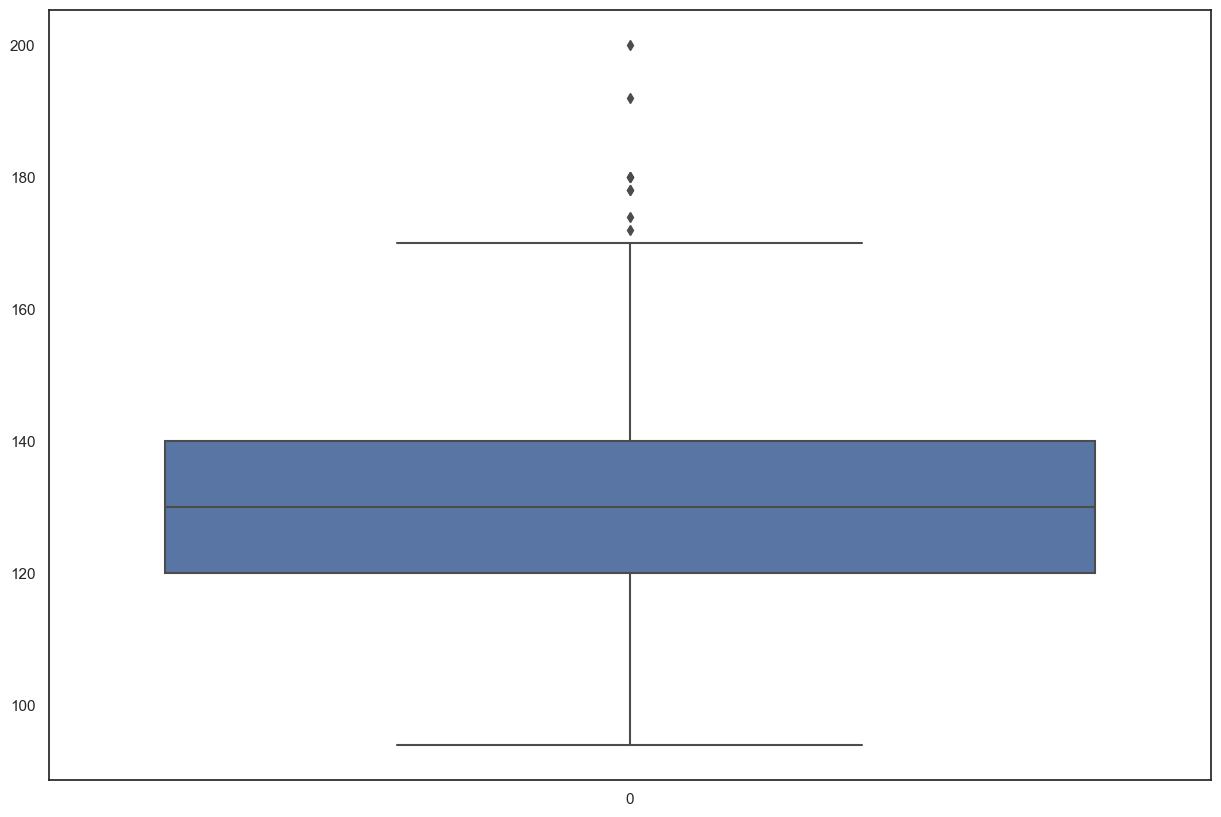

In [136]:
sns.boxplot(ds['trestbps'])
ds_trestbps = ds.loc[ds.trestbps > 170].reset_index()
print(ds_trestbps)

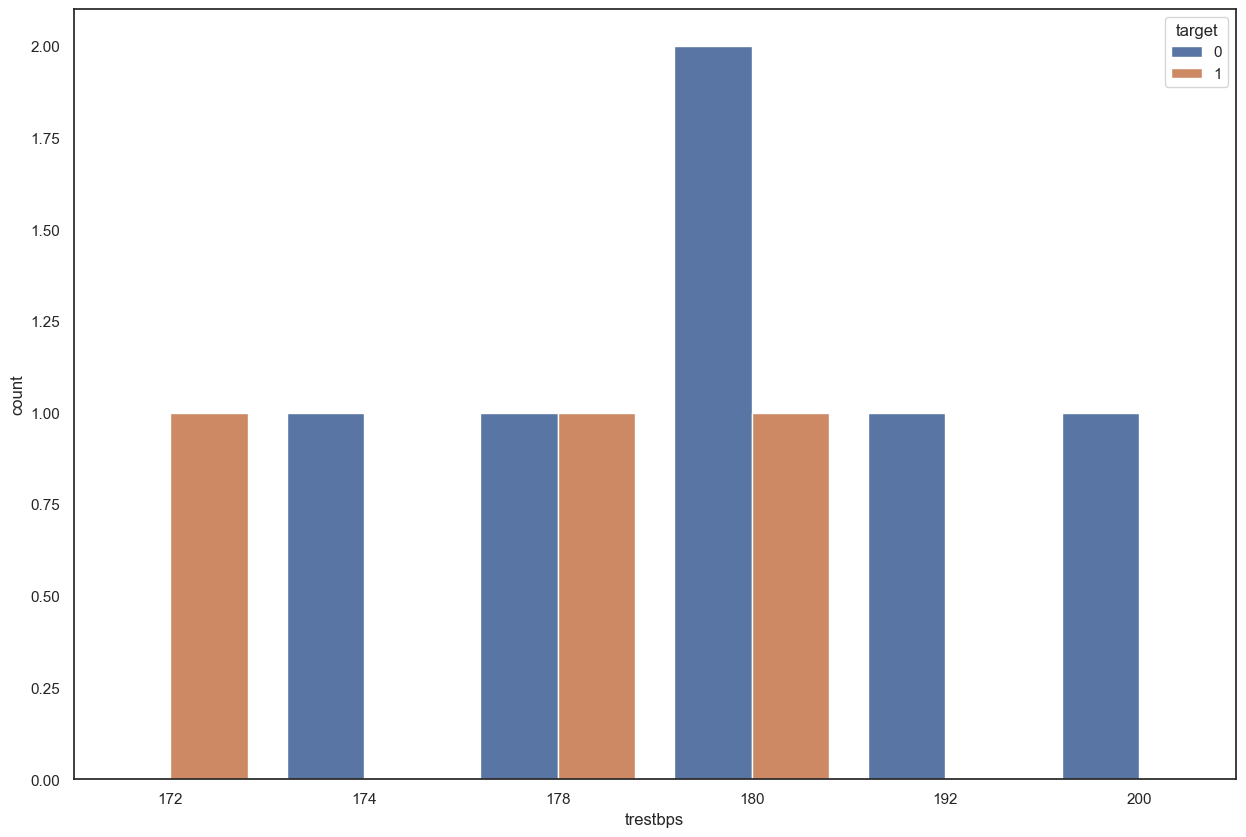

In [137]:
dx = sns.countplot(x = 'trestbps', data=ds_trestbps, hue = 'target')
for container in dx.containers:
        plt.show()

<p><b>From the above graph, it can be concluded that the anomaly in resting blood pressure (trestbps) has no significant effect on the detection of CVD.</b></p>

<h3>f. Describe the relationship between cholesterol levels and a target variable</h3>

In [138]:
ds['chol'].min()
ds['chol'].max()
ds['chol_bins'] = pd.cut(ds.chol, [100, 200, 300, 400, 500, 600],
                          labels = ['101 - 200', '201 - 300', '301-400', '401-500', '501-600'])
ds['chol_bins']

0      201 - 300
1      201 - 300
2      201 - 300
3      201 - 300
4        301-400
         ...    
297    201 - 300
298    201 - 300
299    101 - 200
300    101 - 200
301    201 - 300
Name: chol_bins, Length: 302, dtype: category
Categories (5, object): ['101 - 200' < '201 - 300' < '301-400' < '401-500' < '501-600']

<p><b>CVD is found maximum in people with cholestrol levels between 201 and 300.</b></p>

<h3>g. State what relationship exists between peak exercising and the occurrence of a heart attack</h3>

In [139]:
ds['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

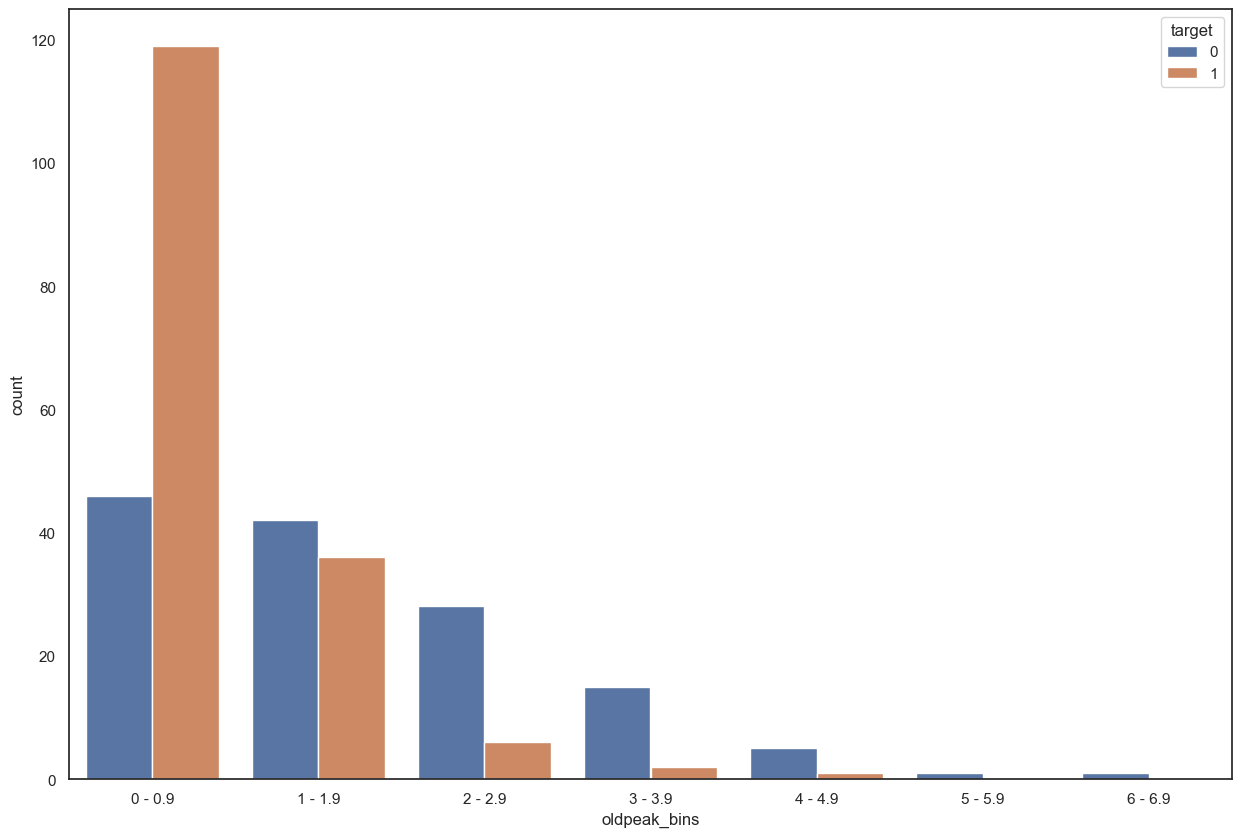

In [141]:
ds['oldpeak_bins'] = pd.cut(ds.oldpeak, [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9],
                             labels = ['0 - 0.9', '1 - 1.9', '2 - 2.9', '3 - 3.9', '4 - 4.9', '5 - 5.9', '6 - 6.9'])

bx = sns.countplot(x = ds['oldpeak_bins'], data = ds, hue = 'target');
for container in bx.containers:        
        plt.show()

<p><b>When the value of oldpeak is between 0 and 0.9, the occurance of CVD is very high. It reduces with increasing value of oldpeak and is completely absent at old peak values above 5.</b></p>

<h3>h. Check if thalassemia is a major cause of CVD</h3>

In [142]:
ds['thal'].unique()

array([1, 2, 3, 0])

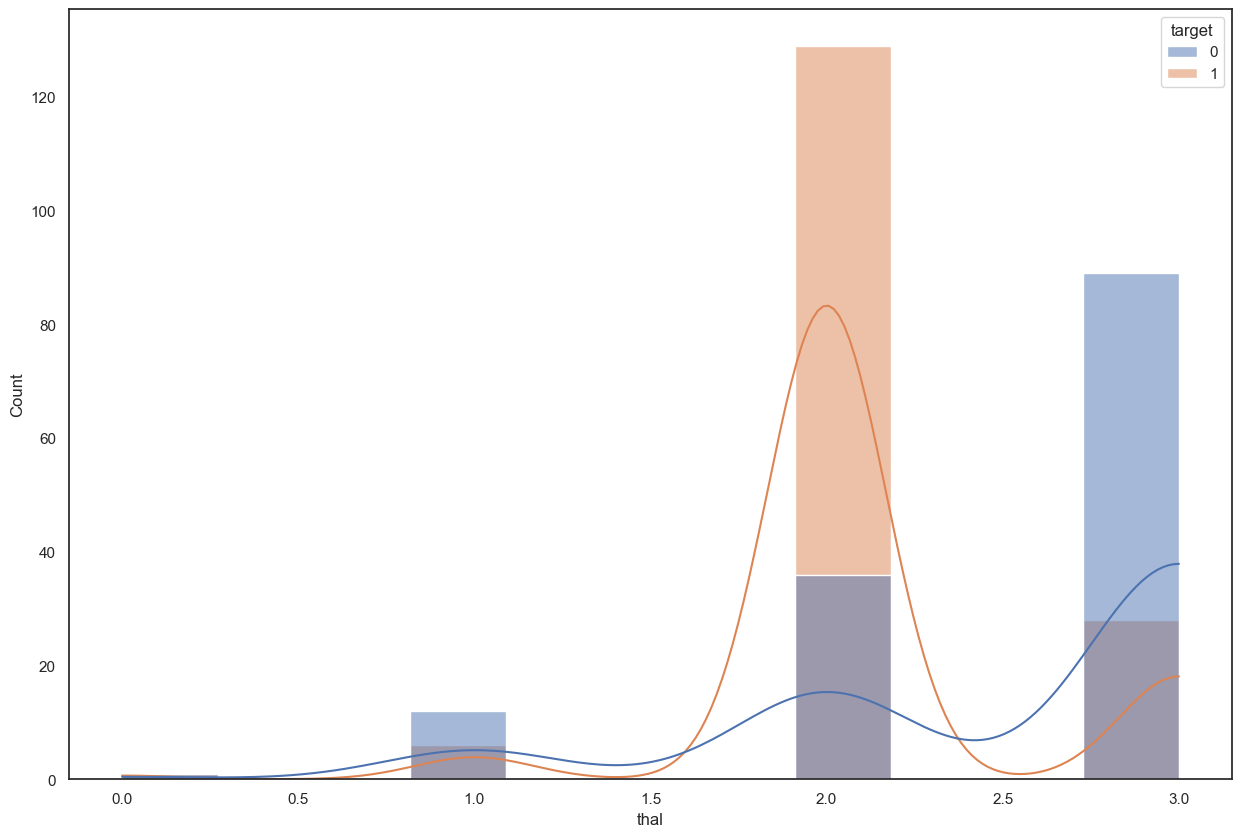

In [143]:
sns.histplot(x = ds['thal'], data = ds, hue='target', kde=True)
plt.show()

<h3>i. List how the other factors determine the occurrence of CVD</h3>

In [144]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins,chol_bins,oldpeak_bins
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-64,201 - 300,2 - 2.9
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,35-39,201 - 300,3 - 3.9
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-44,201 - 300,1 - 1.9
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55-59,201 - 300,0 - 0.9
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55-59,301-400,0 - 0.9


In [145]:
ds = ds.drop(columns = ['age', 'sex', 'chol', 'oldpeak'])
ds.head()

,cp,trestbps,fbs,restecg,thalach,exang,slope,ca,thal,target,age_bins,chol_bins,oldpeak_bins
0,3,145,1,0,150,0,0,0,1,1,60-64,201 - 300,2 - 2.9
1,2,130,0,1,187,0,0,0,2,1,35-39,201 - 300,3 - 3.9
2,1,130,0,0,172,0,2,0,2,1,40-44,201 - 300,1 - 1.9
3,1,120,0,1,178,0,2,0,2,1,55-59,201 - 300,0 - 0.9
4,0,120,0,1,163,1,2,0,2,1,55-59,301-400,0 - 0.9


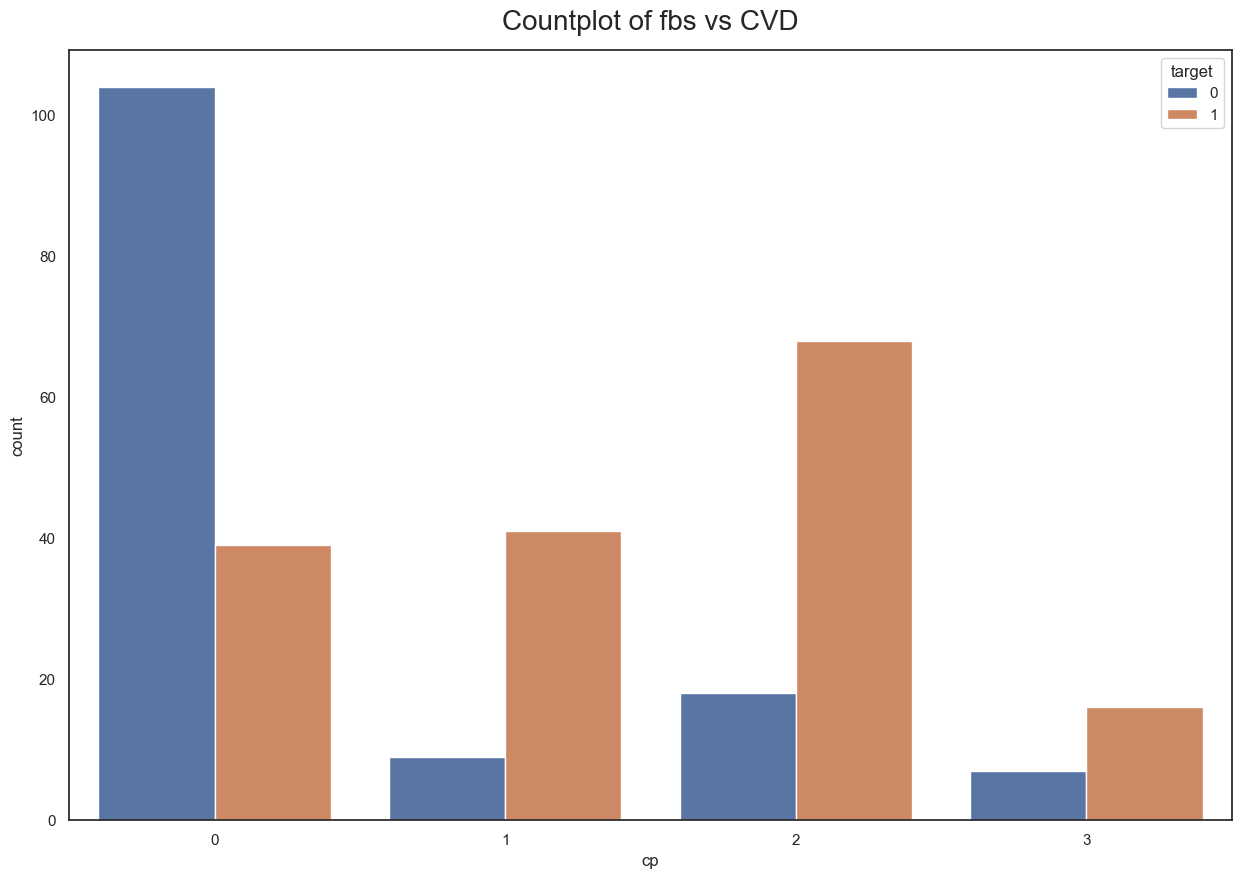

In [99]:
ex = sns.countplot(x = ds['cp'], data = ds, hue='target');
for container in ex.containers:
        ex.set_title('Countplot of fbs vs CVD', pad=15, fontsize=20)
        plt.show()

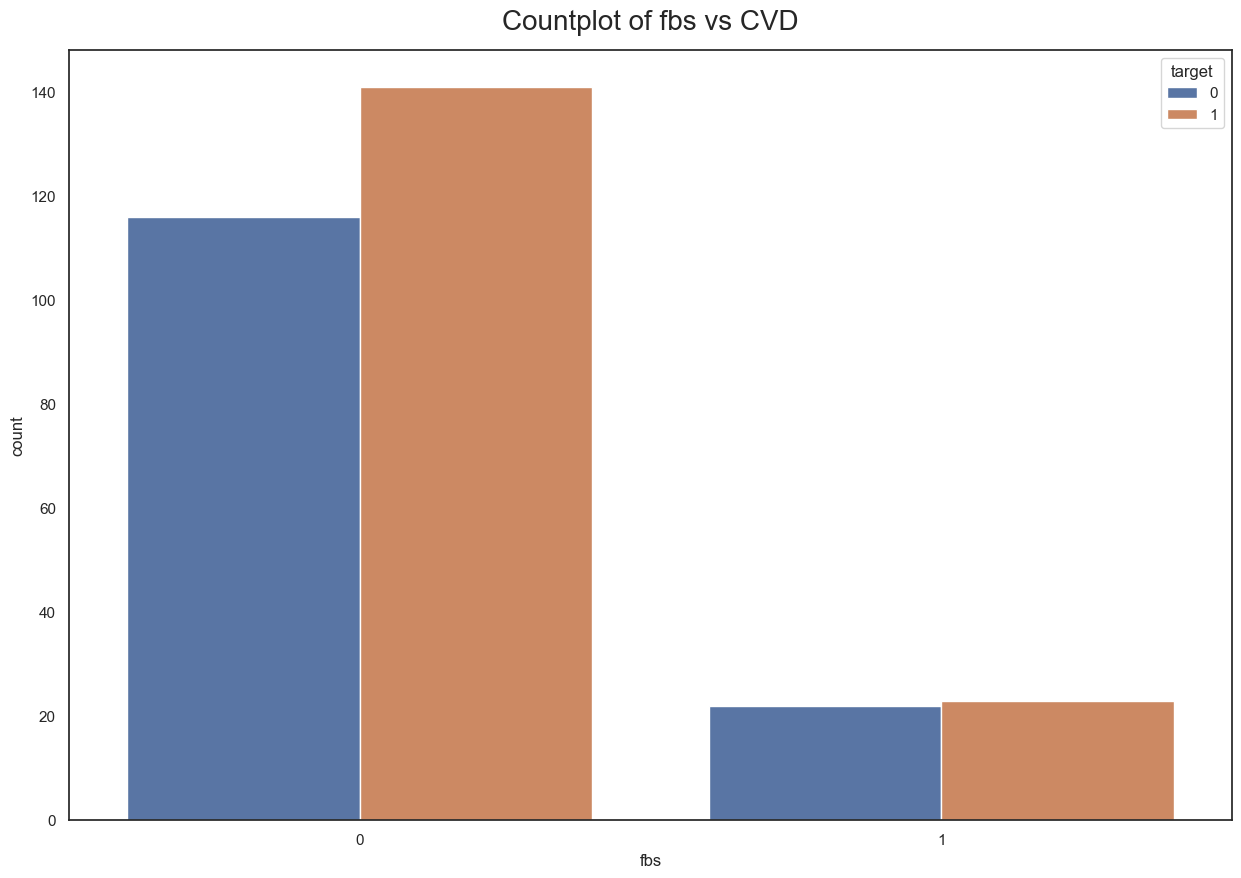

In [98]:
ex = sns.countplot(x = ds['fbs'], data = ds, hue='target')
for container in ex.containers:
        ex.set_title('Countplot of fbs vs CVD', pad=15, fontsize=20)
        plt.show()

<h3>j. Use a pair plot to understand the relationship between all the given variables</h3>

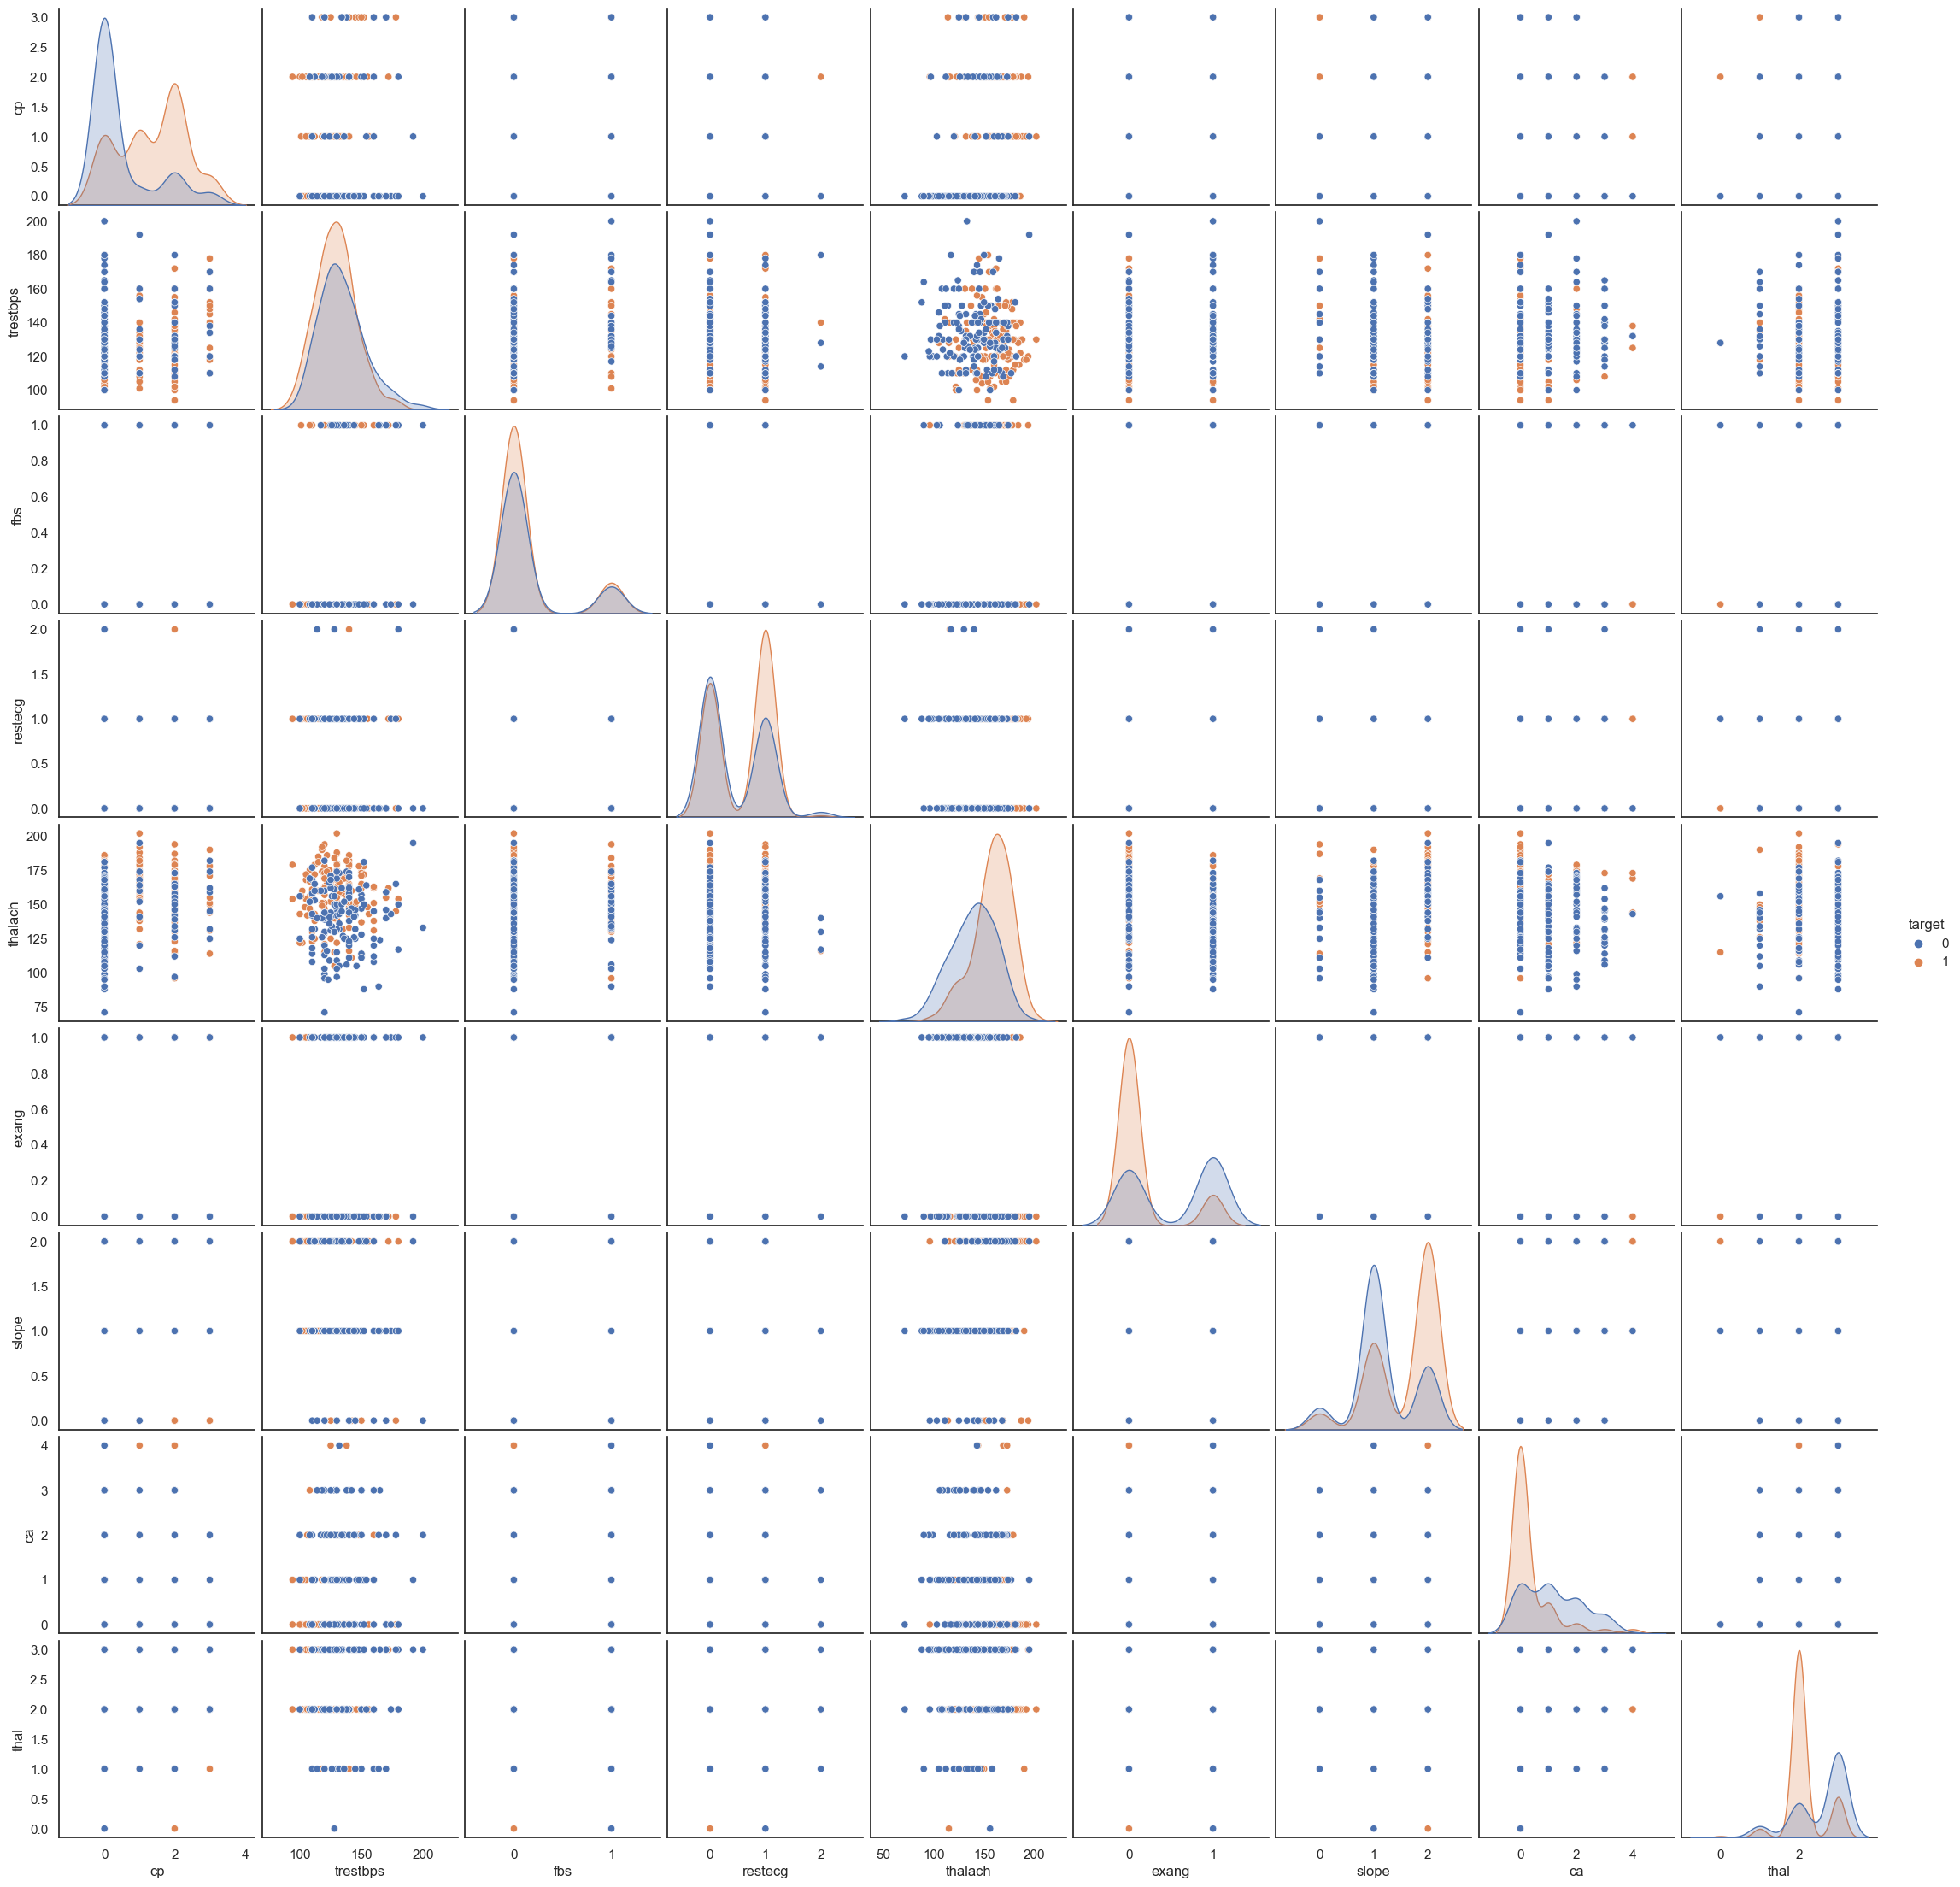

In [146]:
sns.pairplot(ds, hue = 'target');

<p><b>Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection.</b></p>

In [147]:
ds["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<p><b>We see from the above that we don't have a problem with class imbalance.</b></p>

In [152]:
#Scaling of data
from sklearn.preprocessing import MinMaxScaler

In [153]:
ds_num.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [154]:
mn = MinMaxScaler()
mn_ds = mn.fit_transform(ds_num)

In [155]:
mn_ds_mn = pd.DataFrame(mn_ds, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"], index = ds.index)

In [156]:
mn_ds_mn.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,0.529594,0.188499,0.0,0.395833,0.552083,0.666667,1.0
sex,302.0,0.682119,0.466426,0.0,0.000000,1.000000,1.000000,1.0
cp,302.0,0.321192,0.344015,0.0,0.000000,0.333333,0.666667,1.0
trestbps,302.0,0.354742,0.165692,0.0,0.245283,0.339623,0.433962,1.0
chol,302.0,0.275114,0.118159,0.0,0.194064,0.261416,0.339612,1.0
fbs,302.0,0.149007,0.356686,0.0,0.000000,0.000000,0.000000,1.0
restecg,302.0,0.263245,0.263014,0.0,0.000000,0.500000,0.500000,1.0
thalach,302.0,0.599767,0.174836,0.0,0.475191,0.622137,0.725191,1.0
exang,302.0,0.327815,0.470196,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,302.0,0.168233,0.187331,0.0,0.000000,0.129032,0.258065,1.0


<h3>Train - Test - Split</h3>

In [157]:
X = mn_ds_mn
y = ds["target"]

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=102)

<h3>Logistic Regression</h3>

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
logr =  LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [165]:
pred = logr.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [167]:
accuracy_score(y_test, pred)

0.8064516129032258

In [168]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.78      0.88      0.82        16

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



<h3>Random Forest</h3>

In [170]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [171]:
pred_rf = rf.predict(X_test)

In [172]:
accuracy_score(y_test, pred_rf)

0.8387096774193549

In [173]:
accuracy_score(y_train, rf.predict(X_train))

1.0

In [174]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



<p><b>Explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection</b></p>

In [175]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.342561
         Iterations 7


In [176]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  271
Model:                          Logit   Df Residuals:                      258
Method:                           MLE   Df Model:                           12
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.5027
Time:                        13:44:38   Log-Likelihood:                -92.834
converged:                       True   LL-Null:                       -186.69
Covariance Type:            nonrobust   LLR p-value:                 1.112e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            1.2129      1.044      1.162      0.245      -0.833       3.259
sex           -1.7616      0.500     -3.520      0.000      -2.742      -0.781
cp             2.6503      0.583      4.548      0.0

In [177]:
logreg_pred = logreg.predict(X_test)
preds = list(map(round, logreg_pred))

In [178]:
print('Accuracy score',accuracy_score(y_test, preds))
print('Recall score',recall_score(y_test, preds))
print('Precision score',precision_score(y_test, preds))
print('f1 score',f1_score(y_test, preds))

Accuracy score 0.8064516129032258
Recall score 0.8125
Precision score 0.8125
f1 score 0.8125


<p>Based on the p-values, we'll select the following features for the new model: sex, cp, thalach, exang, ca, and thal.</p>

In [180]:
ds_new_features = ['sex','cp','thalach','exang','ca','thal']
new_X = ds_num[ds_new_features]
new_X.head()

,sex,cp,thalach,exang,ca,thal
0,1,3,150,0,0,1
1,1,2,187,0,0,2
2,0,1,172,0,0,2
3,1,1,178,0,0,2
4,0,0,163,1,0,2


In [181]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size=0.10, random_state=105)

In [182]:
logreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.398909
         Iterations 7


In [183]:
print(logreg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  271
Model:                          Logit   Df Residuals:                      265
Method:                           MLE   Df Model:                            5
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.4203
Time:                        13:48:14   Log-Likelihood:                -108.10
converged:                       True   LL-Null:                       -186.50
Covariance Type:            nonrobust   LLR p-value:                 4.799e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.4576      0.403     -3.615      0.000      -2.248      -0.667
cp             0.6778      0.170      3.978      0.000       0.344       1.012
thalach        0.0260      0.004      5.899      0.0

In [184]:
logreg1_pred = logreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

In [185]:
print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))

Accuracy score 0.9032258064516129
Recall score 0.9333333333333333
Precision score 0.875
f1 score 0.9032258064516129


<p><b>We'll now try to use the new features X1_train, y1_train, X1_test, y1_test to see if we get any improvement in the random forest model.</b></p>

In [186]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(X1_train, y1_train)

RandomForestClassifier()

In [187]:
pred_rf1 = rf1.predict(X1_test)

In [188]:
accuracy_score(y1_test, pred_rf1)

0.7419354838709677

In [189]:
accuracy_score(y1_train, rf1.predict(X1_train))

0.988929889298893

<p><b>Conclusion:</b>
    <ul>
        <li>It can hence be concluded that logistic regression with new features has given better results for the model.</li>
        <li>Random Forest, on the other hand gives better results with all the variables included.</li>
    </ul>
</p>

<p style="text-align:right; margin-top:20px;"><b>Md Latif</b><br/>
E-Mail: latif127@yahoo.com
</p>